In [263]:
# Importando bibliotecas
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Importar a biblioteca para mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pydot
import pydotplus
import seaborn as sns

In [264]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/labor.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [265]:
# Remover a coluna TBG onde todos os valores são NaN
data.drop(["TBG"], axis=1, inplace=True)

# Atualizar ? para NaN
data = data.mask(data == '?')

In [266]:
# Atualizar NaN para o modo da coluna
data = data.fillna(data.mode().iloc[0])

In [267]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data['Class']
data.drop(["Class"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data, columns=["'referral source'"])
data.drop(["'referral source'"], axis=1, inplace=True)

In [268]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
# node-caps: faltantes
for column in data.columns:
  treinamento_dados[column] = labelencoder.fit_transform(treinamento_dados[column])

In [269]:
# Separar dados de treinamento e de testes
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

In [ ]:
# Criar e treinar árvore de decisão
tree_data = DecisionTreeClassifier(criterion="entropy")
tree_data.fit(dataset_treino, dataset_treino_class)

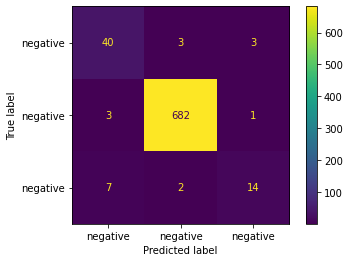

In [271]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_data.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [272]:
# Mostrar métricas
print('Árvore')
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_data.predict(dataset_teste)))
print(classification_report(dataset_teste_class, tree_data.predict(dataset_teste)))

Árvore
Accuracy score =  0.9748344370860927
                         precision    recall  f1-score   support

compensated_hypothyroid       0.80      0.87      0.83        46
               negative       0.99      0.99      0.99       686
    primary_hypothyroid       0.78      0.61      0.68        23

               accuracy                           0.97       755
              macro avg       0.86      0.82      0.84       755
           weighted avg       0.97      0.97      0.97       755



In [ ]:
# Criar e treinar Naive Bayes
gnb = GaussianNB()
gnb.fit(dataset_treino, dataset_treino_class)

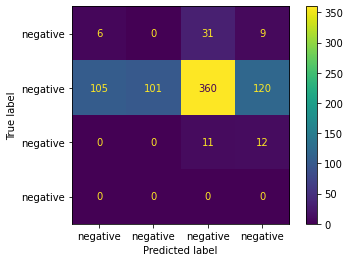

In [274]:
conf_matrix = confusion_matrix(dataset_teste_class, gnb.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [ ]:
# Mostrar métricas
print('Naive Bayes')
print("Accuracy score = ", accuracy_score(dataset_teste_class, gnb.predict(dataset_teste)))
print(classification_report(dataset_teste_class, gnb.predict(dataset_teste)))